In [1]:
#!/usr/bin/python
# coding = utf-8

import numpy as np
from keras import metrics, regularizers, backend
from keras.utils import np_utils
from keras.models import Model
from keras.layers import Input, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import tensorflow as tf
import random as rn
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from keras import metrics, regularizers, optimizers, backend
from keras.callbacks import TensorBoard, EarlyStopping
from keras.models import Model
from keras.layers import Input, Dense, Dropout, BatchNormalization, Conv2D, Flatten, pooling
from keras.utils import np_utils, vis_utils
from keras import metrics, regularizers, optimizers, backend
from keras.callbacks import TensorBoard, EarlyStopping
from keras.models import Model
from keras.layers import Input, Dense, LSTM, CuDNNLSTM, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, vis_utils

Using TensorFlow backend.


In [4]:
# load train data
    #高阶累积量维度
    Nfeature = 9
    #机器学习分类问题共三类
    NClass = 3
    #每类的训练序列个数
    NTrain = 1000
    #导入训练集
    train_data = np.loadtxt('./train_modulation.csv', delimiter = ',', dtype = float)
    #输出正例
    ydata = train_data[:,-1]
    #输入的高阶累积量
    xdata = np.delete(train_data, -1, axis=1)
    index = np.arange(ydata.shape[0])
    #打乱数据集的顺序
    np.random.shuffle(index)
    xdata = xdata[index,:]
    ydata = ydata[index]
    print(ydata)
    type(ydata)
    #ydata = np_utils.to_categorical(ydata, NClass)

[0. 2. 1. ... 2. 1. 1.]


numpy.ndarray

In [3]:
print(ydata)

[1. 0. 1. ... 0. 0. 1.]


In [6]:
if __name__ == '__main__':

    # load train data
    #高阶累积量维度
    Nfeature = 9
    #机器学习分类问题共三类
    NClass = 3
    #每类的训练序列个数
    NTrain = 1000
    #导入训练集
    train_data = np.loadtxt('./train_modulation.csv', delimiter = ',', dtype = float)
    #输出正例
    ydata = train_data[:,-1]
    #输入的高阶累积量
    xdata = np.delete(train_data, -1, axis=1)
    index = np.arange(ydata.shape[0])
    #打乱数据集的顺序
    np.random.shuffle(index)
    xdata = xdata[index,:]
    ydata = ydata[index]
    #把输出类型变换为one hot向量 注意最终模型输出维度为3，输出的结果为预测为8PSK 4PSK 16Qam的每一种类型的概率大小，概率最大的那个就是我们最终调制识别的类型
    ydata = np_utils.to_categorical(ydata, NClass)
    print(int(xdata.shape[0]*9/10))
    #分割训练集和验证集
    xTrain = xdata[0:int(xdata.shape[0]*9/10),:]
    yTrain = ydata[0:int(xdata.shape[0]*9/10),:]
    #此为验证集
    xVal = xdata[int(xdata.shape[0]*9/10):-1,:]
    yVal = ydata[int(xdata.shape[0]*9/10):-1,:]
    
    # train model
    _in_ = Input(shape = (xTrain.shape[1],))
    ot = Dense(512,activation='relu')(_in_)
    ot = Dense(64,use_bias=True, activation='relu')(ot)
    ot = Dense(9,use_bias=True, activation='relu')(ot)
    #ot = Dense(64,use_bias=True, activation='relu')(ot)
    #ot = Dense(32,use_bias=True, activation='relu')(ot)
    #ot = Dense(16,use_bias=True, activation='relu')(ot)
    #ot = Dense(8,use_bias=True, activation='relu')(ot)
    #ot = Dense(10,use_bias=True, activation='relu')(ot)
    _out_ = Dense(NClass, activation='softmax')(ot)
    model = Model(_in_, _out_)


    #early_stopping = EarlyStopping(monitor='val_loss', patience=10)
    checkpoint = ModelCheckpoint(filepath='weights', monitor='val_loss', verbose=1, save_best_only=False)
    adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.compile(loss='categorical_crossentropy',
                   optimizer=adam,
                   metrics=['categorical_accuracy'])


    model.fit(xTrain, yTrain, 
              epochs=2000, 
              batch_size=250,
              validation_data=(xVal,yVal),
              shuffle = True,
              verbose = 2,
              callbacks = [checkpoint])
    print("evaluate the model - train_set:")
    model.summary()
    
  


流式输出内容被截断，只能显示最后 5000 行内容。
Epoch 756/2000
 - 0s - loss: 0.4308 - categorical_accuracy: 0.7607 - val_loss: 0.6978 - val_categorical_accuracy: 0.7124

Epoch 00756: saving model to weights
Epoch 757/2000
 - 0s - loss: 0.4281 - categorical_accuracy: 0.7604 - val_loss: 0.7147 - val_categorical_accuracy: 0.7090

Epoch 00757: saving model to weights
Epoch 758/2000
 - 0s - loss: 0.4268 - categorical_accuracy: 0.7615 - val_loss: 0.7095 - val_categorical_accuracy: 0.7090

Epoch 00758: saving model to weights
Epoch 759/2000
 - 0s - loss: 0.4264 - categorical_accuracy: 0.7630 - val_loss: 0.7122 - val_categorical_accuracy: 0.7124

Epoch 00759: saving model to weights
Epoch 760/2000
 - 0s - loss: 0.4259 - categorical_accuracy: 0.7630 - val_loss: 0.7275 - val_categorical_accuracy: 0.7124

Epoch 00760: saving model to weights
Epoch 761/2000
 - 0s - loss: 0.4251 - categorical_accuracy: 0.7648 - val_loss: 0.7197 - val_categorical_accuracy: 0.7124

Epoch 00761: saving model to weights
Epoch 762/2000
 - 0

In [15]:
print("保存调制识别模型 \n")
    
model.save('modulationModel.h5')

保存调制识别模型 



In [0]:
  # test model
    LOW = -10
    HIGH = 20
    GAP = 2
    NTest = 100
    test_data = np.loadtxt('./test_cumulant.csv', delimiter = ',', dtype = float)
    xTest = test_data[:,0:Nfeature]
    yTest = test_data[:,Nfeature]
    yTest.astype(int)
    yPredict = model.predict(xTest)
    predict_curve = np.zeros((2, int((HIGH-LOW)/GAP) + 1)) # snr + Pc
    #第一个for循环得到x轴的刻度
    for i in range(predict_curve.shape[1]): # snr - [-10 -8 ... 18 20]
        predict_curve[0, i] = LOW + GAP * i
    #不同信噪比的信号 预测正确的个数
    for i in range(test_data.shape[0]): # Pc - count num [241 431 ... 3900 4000 4000]
        snr_loc = int((test_data[i, Nfeature+1] - LOW)/GAP);
        if yTest[i] == np.argmax(yPredict[i,:]):
            predict_curve[1, snr_loc] = predict_curve[1, snr_loc] + 1
    #不同信噪比预测正确的百分比，结果应该为噪声越大，预测准确率越低，信噪比越高，预测准确率越高
    for i in range(predict_curve.shape[1]): # Pc - cal pc(cnt_num/sum_num 3900/4000)
        predict_curve[1, i] = predict_curve[1, i]/(NTest*NClass)
        
    #np.savetxt('CUM_NN_L100.txt', predict_curve, delimiter=',', fmt='%.6f')

In [17]:
print(xTest)

[[3.3780e+00 3.0700e+01 2.0065e+01 ... 1.3146e+01 4.7603e+01 2.7853e+01]
 [5.7661e+00 4.1051e+01 1.6567e+01 ... 4.5010e+01 3.0656e+01 5.9492e-02]
 [5.6692e+00 2.6695e+01 7.9369e+00 ... 1.8400e+01 1.0605e+01 2.8180e+00]
 ...
 [1.8393e-03 1.0745e-02 4.4017e-01 ... 1.2715e+02 8.4533e+01 2.2538e+02]
 [4.9659e-04 9.3519e-03 8.5968e-01 ... 3.0239e+02 4.9546e+01 2.1872e+02]
 [7.7513e-04 9.7297e-03 8.2425e-01 ... 2.6728e+02 7.4578e+01 2.0519e+02]]


In [18]:
print(yPredict)

[[0.35879132 0.29188824 0.34932038]
 [0.35879132 0.29188824 0.34932038]
 [0.35879132 0.29188824 0.34932038]
 ...
 [0.         0.         1.        ]
 [0.         0.         1.        ]
 [0.         0.         1.        ]]


In [3]:

print(predict_curve)


NameError: ignored

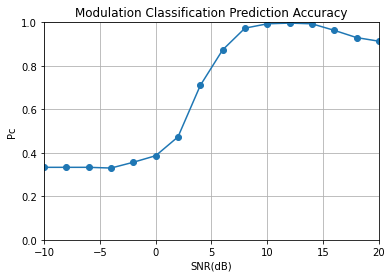

In [8]:
#输入测试集计算预测的准确性，可以看到snr 在5db之下的时候，由于噪声过大，模型识别正确率很低
#当SNR大于等于6db的时候，模型接近百分之百预测正确信号的分类
plt.plot(predict_curve[0], predict_curve[1], 'o-')

plt.grid(True)
#plt.legend(loc='lower right')
plt.xlim((LOW, HIGH))
plt.ylim((0,1))
plt.xlabel('SNR(dB)')
plt.ylabel('Pc')
plt.title('Modulation Classification Prediction Accuracy')
plt.savefig('modulation_accuracy.png', format='png')
#res = np.vstack((snr, acc))

In [0]:
#一个是保存模型用于之后调用 另一个是要把各个不同SNR的图画出来